### Adaptation of Expectation-Maximization from Farrell & Lewandowsky

In [5]:
import numpy as np
import seaborn as sns

<Axes: ylabel='Count'>

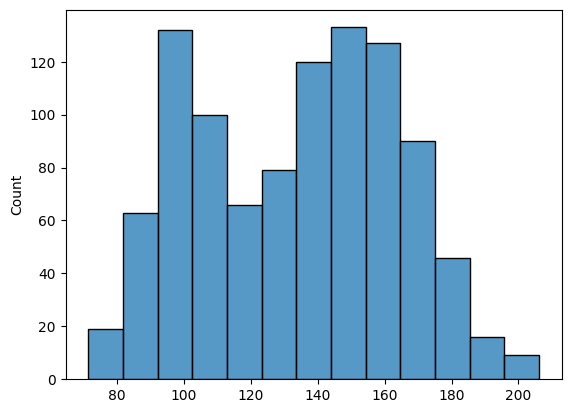

In [ ]:
# Set seed
rng = np.random.default_rng(42)

# Generate some data
N = 1000
pShort = 0.3

# Parameters (list of [mean, sd])
genpars = [(100, 10), (150, 20)]

whichD = rng.choice([0, 1], size=N, replace=True, p=[pShort, 1 - pShort])

dat = np.array([
    rng.normal(loc=genpars[d][0], scale=genpars[d][1])
    for d in whichD
])

sns.histplot(dat)

In [13]:
# Guess parameters
mu1 = np.mean(dat) * 0.8
mu2 = np.mean(dat) * 1.2
sd1 = np.std(dat)
sd2 = np.std(dat)
ppi = 0.5
old_ppi = 0

def weighted_std(x, w, mu):
    mean = np.average(x, weights=w)    
    var = np.average((x - mean) ** 2, weights=w)    
    return np.sqrt(var)

def dnorm(x, mean, sd):
    return (1.0 / (sd * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / sd) ** 2)

while abs(ppi - old_ppi) > 0.00001:
    old_ppi = ppi

    # E step
    num = ppi * dnorm(dat, mu2, sd2)
    den = (1 - ppi) * dnorm(dat, mu1, sd1) + ppi * dnorm(dat, mu2, sd2)
    resp = num / den

    # M step
    mu1 = np.average(dat, weights=1-resp)
    mu2 = np.average(dat, weights=resp)

    sd1 = weighted_std(dat, 1-resp, mu1)
    sd2 = weighted_std(dat, resp, mu2)

    ppi = np.mean(resp)

estimated_parameters = {
    'mu1': mu1,
    'sd1': sd1,
    'mu2': mu2,
    'sd2': sd2,
    'ppi':ppi
}

print(f"Original mu1: {genpars[0][0]} --- Estimated: {mu1}")
print(f"Original sd1: {genpars[0][1]} --- Estimated: {sd1}")
print(f"Original mu2: {genpars[1][0]} --- Estimated: {mu2}")
print(f"Original sd2: {genpars[1][1]} --- Estimated: {sd2}")
print(f"Probability of first distribution: {ppi}")


Original mu1: 100 --- Estimated: 98.60160666189512
Original sd1: 10 --- Estimated: 10.225108083194087
Original mu2: 150 --- Estimated: 149.8550317871608
Original sd2: 20 --- Estimated: 19.935109515525543
Probability of first distribution: 0.6826839434882125
